In [59]:
import requests as rq
import pandas as pd
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [60]:
url = "https://github.com/kairobeduti/DadosShift/blob/master/Principal/Async_Api_Principal.xlsx?raw=true"
data = rq.get(url).content
df = pd.read_excel(BytesIO(data))
df.head()

,Unnamed: 0,OPPORT_NUM,DOU_NUM,LIMIT_IN_DAYS,COMPANY,COMPANY_DESC,STATUS,STATUS_DESC,OPPORT_TYPE,POSTING_DATE,...,HAS_PREQUALIFIED,IS_PREQUALI,PQ_VENDOR_LIST_DATE,PQ_VENDOR_LIST_HOUR,DESC_DETAIL,REGIONS,AUC_START_DATE,AUC_START_TIME,NAT_COVERAGE,DESC_OBJ_CONTRAT
0,0,7001983403,NaN,0,1000,Petróleo Brasileiro S. A.,E0005,PATEC cancelled,LICI,0000-00-00,...,NaN,NaN,0000-00-00,00:00:00,NaN,[],0000-00-00,00:00:00,NaN,CALHA PARA CABOS ELÉTRICOS
1,1,7001980909,NaN,0,1000,Petróleo Brasileiro S. A.,NaN,NaN,LDNT,0000-00-00,...,NaN,NaN,0000-00-00,00:00:00,NaN,[],0000-00-00,00:00:00,NaN,Serviços de Injeção de Traçadores
2,0,7001996079,NaN,0,1000,Petróleo Brasileiro S. A.,NaN,NaN,LICI,0000-00-00,...,NaN,NaN,0000-00-00,00:00:00,NaN,[],0000-00-00,00:00:00,NaN,Válvula Hidráulica
3,1,7002002456,NaN,0,1000,Petróleo Brasileiro S. A.,E0008,Habilitação Concluída,LICI,0000-00-00,...,NaN,NaN,0000-00-00,00:00:00,NaN,[],0000-00-00,00:00:00,NaN,Anodo Galvanizado
4,2,7001993452,NaN,0,1000,Petróleo Brasileiro S. A.,E0005,PATEC cancelled,LICI,0000-00-00,...,NaN,NaN,0000-00-00,00:00:00,NaN,[],0000-00-00,00:00:00,NaN,Válvula Esfera


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           9952 non-null   int64  
 1   OPPORT_NUM           9952 non-null   int64  
 2   DOU_NUM              0 non-null      float64
 3   LIMIT_IN_DAYS        9952 non-null   int64  
 4   COMPANY              9952 non-null   int64  
 5   COMPANY_DESC         9952 non-null   object 
 6   STATUS               6454 non-null   object 
 7   STATUS_DESC          6454 non-null   object 
 8   OPPORT_TYPE          9952 non-null   object 
 9   POSTING_DATE         9952 non-null   object 
 10  OPPORT_DESCR         9941 non-null   object 
 11  DOU_PUBL_DATE        9952 non-null   object 
 12  START_DATE           9952 non-null   object 
 13  START_HOUR           9952 non-null   object 
 14  END_DATE             9952 non-null   object 
 15  END_HOUR             9952 non-null   o

In [62]:
novas_colunas = df.columns.to_list()
novas_colunas[0] = 'SEQ'
df.set_axis(novas_colunas, axis=1,inplace=True)
df.head(2)

,SEQ,OPPORT_NUM,DOU_NUM,LIMIT_IN_DAYS,COMPANY,COMPANY_DESC,STATUS,STATUS_DESC,OPPORT_TYPE,POSTING_DATE,...,HAS_PREQUALIFIED,IS_PREQUALI,PQ_VENDOR_LIST_DATE,PQ_VENDOR_LIST_HOUR,DESC_DETAIL,REGIONS,AUC_START_DATE,AUC_START_TIME,NAT_COVERAGE,DESC_OBJ_CONTRAT
0,0,7001983403,NaN,0,1000,Petróleo Brasileiro S. A.,E0005,PATEC cancelled,LICI,0000-00-00,...,NaN,NaN,0000-00-00,00:00:00,NaN,[],0000-00-00,00:00:00,NaN,CALHA PARA CABOS ELÉTRICOS
1,1,7001980909,NaN,0,1000,Petróleo Brasileiro S. A.,NaN,NaN,LDNT,0000-00-00,...,NaN,NaN,0000-00-00,00:00:00,NaN,[],0000-00-00,00:00:00,NaN,Serviços de Injeção de Traçadores


In [63]:
#dropar colunas vazias
#how=all, dropa somente quando a coluna inteira está vazia
df.dropna(axis='columns',how='all',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   SEQ                  9952 non-null   int64 
 1   OPPORT_NUM           9952 non-null   int64 
 2   LIMIT_IN_DAYS        9952 non-null   int64 
 3   COMPANY              9952 non-null   int64 
 4   COMPANY_DESC         9952 non-null   object
 5   STATUS               6454 non-null   object
 6   STATUS_DESC          6454 non-null   object
 7   OPPORT_TYPE          9952 non-null   object
 8   POSTING_DATE         9952 non-null   object
 9   OPPORT_DESCR         9941 non-null   object
 10  DOU_PUBL_DATE        9952 non-null   object
 11  START_DATE           9952 non-null   object
 12  START_HOUR           9952 non-null   object
 13  END_DATE             9952 non-null   object
 14  END_HOUR             9952 non-null   object
 15  OPEN_DATE            9952 non-null   object
 16  OPEN_H

In [64]:
#dropar colunas que tem somente 1 registro para todo o dataset
lista_colunas = df.columns.to_list()
lista_valor_unico_remover = []
for row in lista_colunas:
  if len(df[row].unique()) == 1:
    lista_valor_unico_remover.append(row)
print(lista_valor_unico_remover)
df.drop(columns=lista_valor_unico_remover,inplace=True)
df.info()

['LIMIT_IN_DAYS', 'COMPANY', 'COMPANY_DESC', 'POSTING_DATE', 'OPEN_DATE', 'OPEN_HOUR', 'PQ_VENDOR_LIST_DATE', 'PQ_VENDOR_LIST_HOUR', 'REGIONS']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SEQ               9952 non-null   int64 
 1   OPPORT_NUM        9952 non-null   int64 
 2   STATUS            6454 non-null   object
 3   STATUS_DESC       6454 non-null   object
 4   OPPORT_TYPE       9952 non-null   object
 5   OPPORT_DESCR      9941 non-null   object
 6   DOU_PUBL_DATE     9952 non-null   object
 7   START_DATE        9952 non-null   object
 8   START_HOUR        9952 non-null   object
 9   END_DATE          9952 non-null   object
 10  END_HOUR          9952 non-null   object
 11  SUB_STATUS        9952 non-null   int64 
 12  DISPUTE_MODE      9952 non-null   int64 
 13  ANEXOS            9952 non-null   object
 14  ITEMS   

In [65]:
df['OPPORT_DESCR'].fillna('SEM DESCRICAO',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SEQ               9952 non-null   int64 
 1   OPPORT_NUM        9952 non-null   int64 
 2   STATUS            6454 non-null   object
 3   STATUS_DESC       6454 non-null   object
 4   OPPORT_TYPE       9952 non-null   object
 5   OPPORT_DESCR      9952 non-null   object
 6   DOU_PUBL_DATE     9952 non-null   object
 7   START_DATE        9952 non-null   object
 8   START_HOUR        9952 non-null   object
 9   END_DATE          9952 non-null   object
 10  END_HOUR          9952 non-null   object
 11  SUB_STATUS        9952 non-null   int64 
 12  DISPUTE_MODE      9952 non-null   int64 
 13  ANEXOS            9952 non-null   object
 14  ITEMS             9952 non-null   object
 15  AUC_START_DATE    9952 non-null   object
 16  AUC_START_TIME    9952 non-null   object
 17  DESC_OBJ_CONTR

In [66]:
df['STATUS'].fillna('SEM STATUS',inplace=True)
df['STATUS_DESC'].fillna('SEM STATUS_DESC',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SEQ               9952 non-null   int64 
 1   OPPORT_NUM        9952 non-null   int64 
 2   STATUS            9952 non-null   object
 3   STATUS_DESC       9952 non-null   object
 4   OPPORT_TYPE       9952 non-null   object
 5   OPPORT_DESCR      9952 non-null   object
 6   DOU_PUBL_DATE     9952 non-null   object
 7   START_DATE        9952 non-null   object
 8   START_HOUR        9952 non-null   object
 9   END_DATE          9952 non-null   object
 10  END_HOUR          9952 non-null   object
 11  SUB_STATUS        9952 non-null   int64 
 12  DISPUTE_MODE      9952 non-null   int64 
 13  ANEXOS            9952 non-null   object
 14  ITEMS             9952 non-null   object
 15  AUC_START_DATE    9952 non-null   object
 16  AUC_START_TIME    9952 non-null   object
 17  DESC_OBJ_CONTR

In [67]:
df.drop('STATUS',axis='columns',inplace=True)

In [68]:
#juntar start date + start hour
df['START_DATE'] = df['START_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['START_DATE_H'] = pd.to_datetime(df['START_DATE'] + ' ' +df['START_HOUR'])
df.drop(columns=['START_DATE'],inplace=True)
df.drop(columns=['START_HOUR'],inplace=True)

In [69]:
#juntar end date + end hour
df['END_DATE'] = df['END_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['END_DATE_H'] = pd.to_datetime(df['END_DATE'] + ' ' +df['END_HOUR'])
df.drop(columns=['END_DATE'],inplace=True)
df.drop(columns=['END_HOUR'],inplace=True)

In [70]:
#juntar auc date + auchour
df['AUC_START_DATE'] = df['AUC_START_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x )
df['AUC_START_DATE_H'] = pd.to_datetime(df['AUC_START_DATE'] + ' ' +df['AUC_START_TIME'])
df.drop(columns=['AUC_START_DATE'],inplace=True)
df.drop(columns=['AUC_START_TIME'],inplace=True)

In [71]:
#juntar auc date + auchour
df['DOU_PUBL_DATE'] = pd.to_datetime(df['DOU_PUBL_DATE'].apply(lambda x: '1900-01-01' if x == '0000-00-00' else x ))

In [72]:
#drop colunas anexo e itens
df.drop(columns=['ANEXOS','ITEMS'],inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9952 entries, 0 to 9951
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   SEQ               9952 non-null   int64         
 1   OPPORT_NUM        9952 non-null   int64         
 2   STATUS_DESC       9952 non-null   object        
 3   OPPORT_TYPE       9952 non-null   object        
 4   OPPORT_DESCR      9952 non-null   object        
 5   DOU_PUBL_DATE     9952 non-null   datetime64[ns]
 6   SUB_STATUS        9952 non-null   int64         
 7   DISPUTE_MODE      9952 non-null   int64         
 8   DESC_OBJ_CONTRAT  9916 non-null   object        
 9   START_DATE_H      9952 non-null   datetime64[ns]
 10  END_DATE_H        9952 non-null   datetime64[ns]
 11  AUC_START_DATE_H  9952 non-null   datetime64[ns]
dtypes: datetime64[ns](4), int64(4), object(4)
memory usage: 933.1+ KB


In [74]:
cols_object = df.select_dtypes([object]).describe().T
cols_object = cols_object.reset_index()
cols_object['dist_uniques'] = (cols_object['unique'] / cols_object['count'])*100
cols_object = cols_object[cols_object['dist_uniques']<80]
lista_objects = cols_object['index'].to_list()

2
STATUS_DESC
OPPORT_TYPE


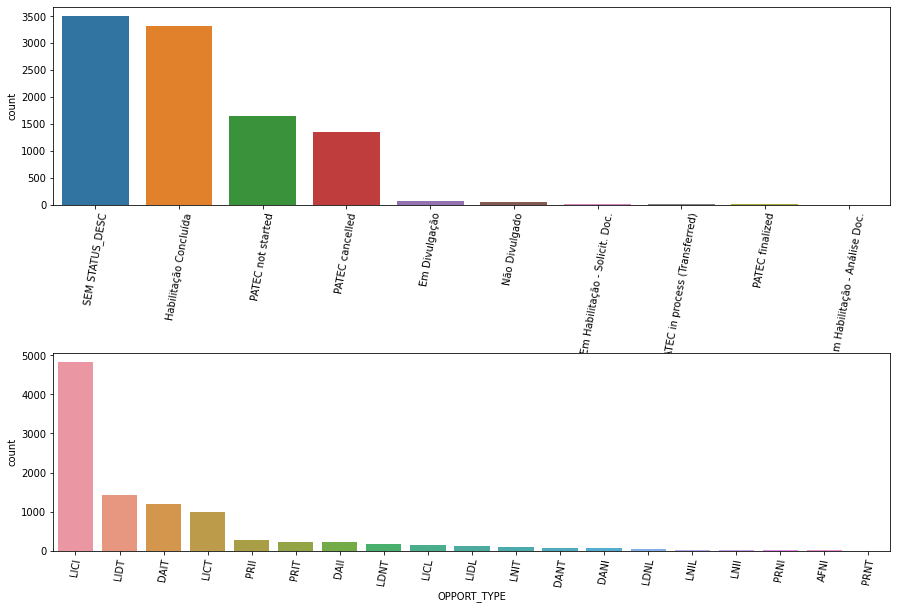

In [75]:
qtdplots = len(lista_objects)

if qtdplots==1:
  f, ax = plt.subplots(figsize=(15,10))
  sns.countplot(x=lista_objects[0], data=df, order=df[lista_objects[0]].value_counts().index)
else:

  print(qtdplots)
  f, ax = plt.subplots(qtdplots,1,figsize=(15,10))
  # Adjust the subplot layout parameters
  f.subplots_adjust(hspace=0.750, wspace=0.125)
  for idx,plts in enumerate(lista_objects):
    print(plts)
    ax[idx]=sns.countplot(ax=ax[idx],x=plts, data=df, order=df[plts].value_counts().index)
    ax[idx].tick_params(axis='x', rotation=80)


##IMPLEMENTAR O LOOP PARA QUNADO ENCONTRA MAIS DE UM OBJECT

<AxesSubplot:xlabel='DISPUTE_MODE', ylabel='count'>

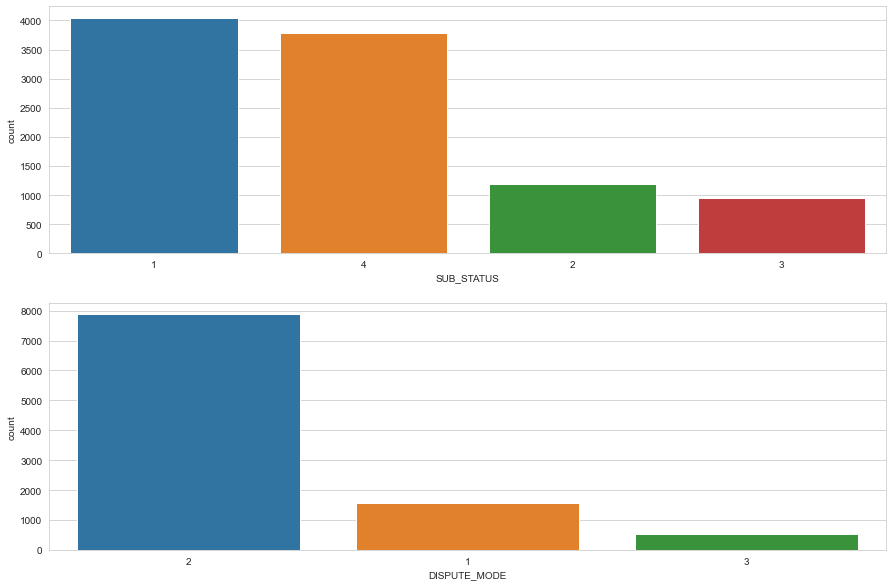

In [76]:
sns.set_style('whitegrid')
f, ax = plt.subplots(2,1,figsize=(15,10))
sns.countplot(ax=ax[0],x='SUB_STATUS', data=df, order=df['SUB_STATUS'].value_counts().index)
sns.countplot(ax=ax[1],x='DISPUTE_MODE', data=df, order=df['DISPUTE_MODE'].value_counts().index)

In [77]:
df['END_DATE_H_MES'] = df['END_DATE_H'].dt.to_period('M')

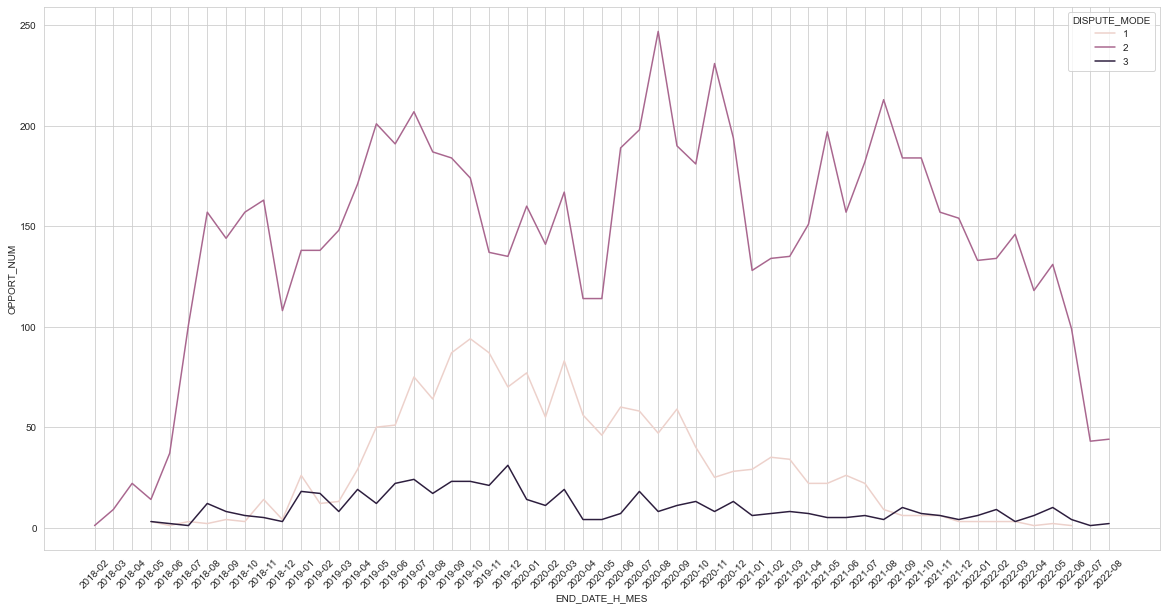

In [78]:
df_ano_mes_dispute = df.groupby(['END_DATE_H_MES','DISPUTE_MODE']).count()[['OPPORT_NUM']]
df_ano_mes_dispute.reset_index(inplace=True)
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=df_ano_mes_dispute, x=df_ano_mes_dispute['END_DATE_H_MES'].astype('str'), y=df_ano_mes_dispute['OPPORT_NUM'], ci=None, hue='DISPUTE_MODE')
ax.tick_params(axis='x', rotation=45)

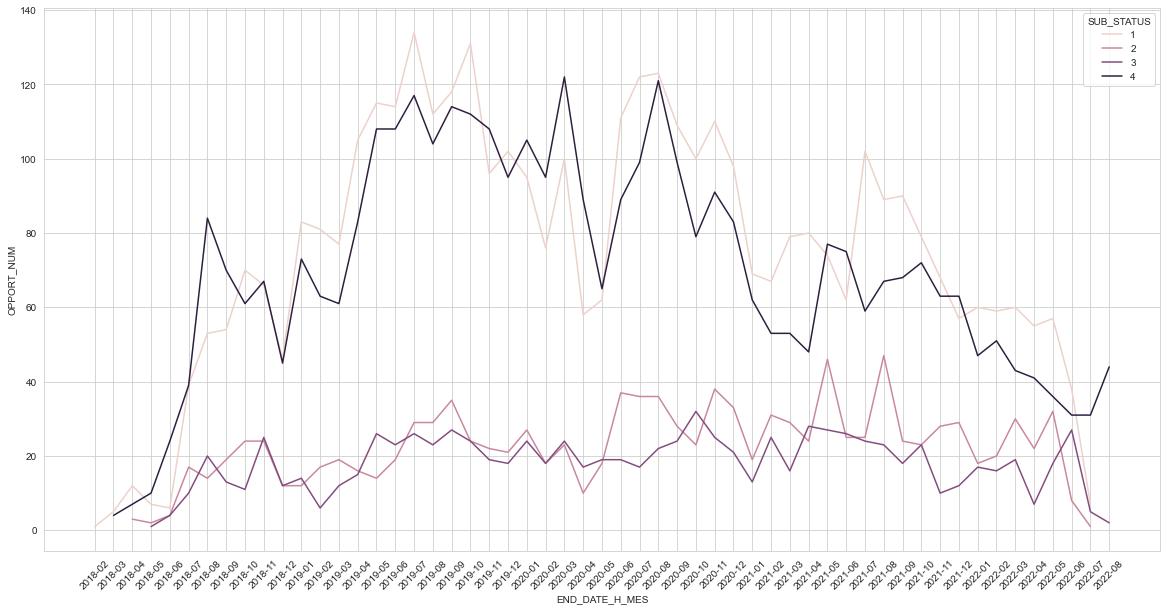

In [79]:
ano_mes_substatus = df.groupby(['END_DATE_H_MES','SUB_STATUS']).count()[['OPPORT_NUM']]
ano_mes_substatus.reset_index(inplace=True)
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(20,10))
sns.lineplot(data=ano_mes_substatus, x=ano_mes_substatus['END_DATE_H_MES'].astype('str'), y=ano_mes_substatus['OPPORT_NUM'], ci=None, hue='SUB_STATUS')
ax.tick_params(axis='x', rotation=45)

In [80]:
df['DURACAO']= (df['END_DATE_H'].dt.date - df['START_DATE_H'].dt.date).dt.days
df['DURACAO'].describe()
df.shape

(9952, 14)

In [90]:
df = df[df['DURACAO']>0]
df = df[df['DURACAO']<200]
df.shape

(9921, 14)

In [91]:
df['DURACAO'].describe()

count    9921.000000
mean       22.024594
std        18.128028
min         1.000000
25%        10.000000
50%        18.000000
75%        27.000000
max       198.000000
Name: DURACAO, dtype: float64

c:\Users\kairo\anaconda3\envs\AmbienteKairo\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


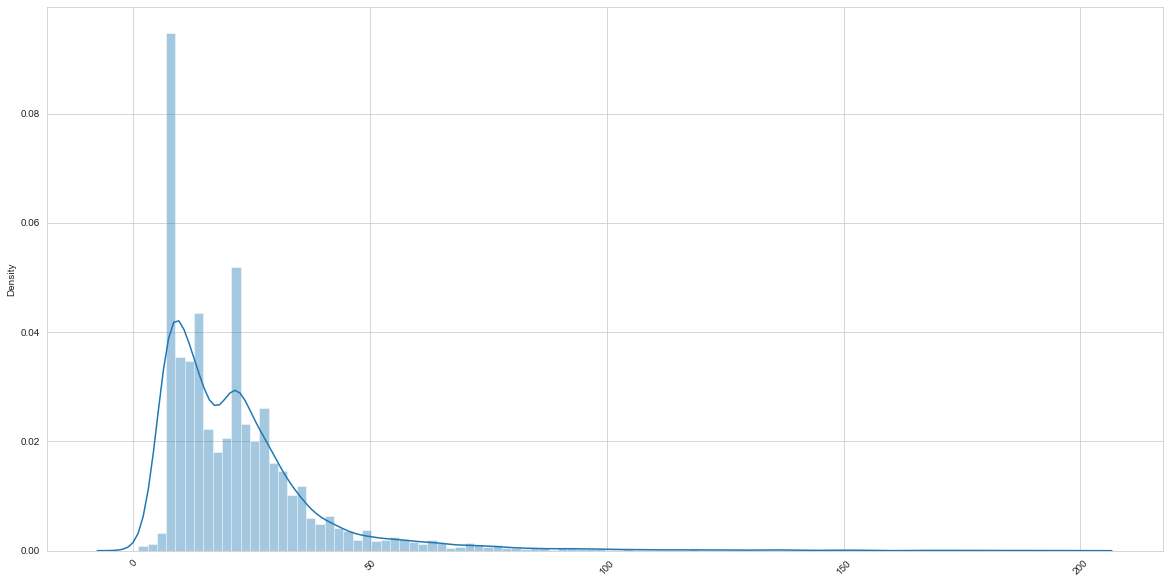

In [92]:
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(20,10))
sns.distplot(x=df['DURACAO'],bins=100)
ax.tick_params(axis='x', rotation=45)